In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('laptop_data.csv')
df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [3]:
df.shape

(1303, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [5]:
df.duplicated().sum()

0

In [6]:
df.isna().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

Removing Unnamed Column

# Feature Engineering 

Removing 'Unnamed: 0' column

In [7]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

Removing 'kg' and 'GB' unit from 'Ram' and 'Weight' column

In [8]:
df['Ram'] = df['Ram'].str.replace('GB', '')
df['Weight'] = df['Weight'].str.replace('kg', '')

In [9]:
df['Ram'] = df['Ram'].astype('int64')
df['Weight'] = df['Weight'].astype('float64')

In [10]:
df.dtypes

Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                   int64
Memory               object
Gpu                  object
OpSys                object
Weight              float64
Price               float64
dtype: object

Our ScreenResolution column contains a lot of information. The ScreenResolution column gives information related to the presence of an IPS panel, are a laptop touch screen resolution. So, we will extract the column into 3 new columns in the dataset.

In [11]:
#  1) Extract Touch screen information
#  Touch screen column can be encoded as 0 and 1 as it is binary variable. 1 means latop is touch screen and 0 means it is not.
df["TouchScreen"] = df["ScreenResolution"].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [12]:
#  2) Extract IPS column
#  This column can also be encoded into 0 and 1 as it is binary variable like Touchscreen
df['Ips']=df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

# Extract x-axis and y-axis screen resolution dimensions

Now both dimensions are present at the end of string and are clearly divided by a cross. In order to access the last string in the list, we will first separate the string using a space. Then access the zero and first index for X and Y-axis dimensions after splitting the string with a cross. 

In [13]:
temp = df['ScreenResolution'].str.split('x', n=1, expand = True)

In [14]:
df['X_res']=temp[0]
df['Y_res'] = temp[1]

In [15]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [16]:
df['X_res'] =  df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [17]:
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')

# Replacing inches, X and Y resolution to PPI

Inches do not have a significant connection with price when you use the corr technique to determine the correlation of columns with price, but X and Y-axis resolution do, therefore you may use that to your advantage and combine these three columns into one column known as "pixel per inches" (PPI). In the end, we want to have less feature in order to increase performance

In [18]:
df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')

In [19]:
df.drop(columns=['ScreenResolution', 'Inches', 'X_res', 'Y_res'], inplace=True)

In [20]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


We will be doing the same to the CPU column because it also contains lots of information. We can see that it have 118 different categories and it gives the information about the preprocessors in laptops and speed.

In [21]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [22]:
df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

To extract the preprocessor we need to extract the first three words from the string. We are having an intel preprocessor and AMD preporcessor so we are keeping 5  categories in our dataset as i3, i5, i7, other intel processor, and AMD processors.

In [23]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [24]:
df['Cpu Brand'] = df['Cpu Name'].apply(fetch_processor)

In [25]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,ppi,Cpu Name,Cpu Brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5


In [26]:
df.drop(['Cpu', 'Cpu Name'], axis =1, inplace=True)

From 'Memory' column, we are going to extract four features that is HHD, SSD, Flash storage, Hybrid

In [27]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [28]:
df["Memory"] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n=1, expand=True)

df["first"] = new[0]
df["first"] = df["first"].str.strip()

df['second']=new[1]

df['Layer1HDD'] = df['first'].apply(lambda x:1 if 'HDD' in x else 0)
df['Layer1SSD'] = df['first'].apply(lambda x:1 if 'SSD' in x else 0)
df['Layer1Hybrid'] = df['first'].apply(lambda x:1 if 'Hybrid' in x else 0)
df['Layer1Flash_Storage'] = df['first'].apply(lambda x:1 if 'Flash Storage' in x else 0)

df['first'] = df['first'].str.replace(r'\D', '')

df['second'].fillna('0', inplace = True)

df['Layer2HDD'] = df['second'].apply(lambda x:1 if 'HDD' in x else 0)
df['Layer2SSD'] = df['second'].apply(lambda x:1 if 'SSD' in x else 0)
df['Layer2Hybrid'] = df['second'].apply(lambda x:1 if 'Hybrid' in x else 0)
df['Layer2Flash_Storage'] = df['second'].apply(lambda x:1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '')

df['first'] = df['first'].astype(int)
df['second'] = df['second'].astype(int)



C:\Users\Crystal\AppData\Local\Temp\ipykernel_18392\2814763419.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  df['first'] = df['first'].str.replace(r'\D', '')
C:\Users\Crystal\AppData\Local\Temp\ipykernel_18392\2814763419.py:25: FutureWarning: The default value of regex will change from True to False in a future version.
  df['second'] = df['second'].str.replace(r'\D', '')


In [29]:
df

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,...,first,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,...,128,0,0,1,0,0,0,0,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,...,128,0,0,0,0,1,0,0,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,...,256,0,0,1,0,0,0,0,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,...,512,0,0,1,0,0,0,0,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,...,256,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,128 SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,...,128,0,0,1,0,0,0,0,0,0
1299,Lenovo,2 in 1 Convertible,16,512 SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,...,512,0,0,1,0,0,0,0,0,0
1300,Lenovo,Notebook,2,64 Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,...,64,0,0,0,0,1,0,0,0,0
1301,HP,Notebook,6,1000 HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,...,1000,0,1,0,0,0,0,0,0,0


In [30]:
df['HDD'] = (df['first']*df['Layer1HDD']+df['second']*df['Layer2HDD'])
df['SSD'] = (df['first']*df['Layer1SSD']+df['second']*df['Layer2SSD'])
df['Hybrid'] = (df['first']*df['Layer1Hybrid']+df['second']*df['Layer2Hybrid'])
df['Flash_Storage'] = (df['first']*df['Layer1Flash_Storage']+df['second']*df['Layer2Flash_Storage'])


In [31]:
df

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,...,Layer1Hybrid,Layer1Flash_Storage,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,...,0,0,0,0,0,0,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,...,0,1,0,0,0,0,0,0,0,128
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,...,0,0,0,0,0,0,0,256,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,...,0,0,0,0,0,0,0,512,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,...,0,0,0,0,0,0,0,256,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,128 SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,...,0,0,0,0,0,0,0,128,0,0
1299,Lenovo,2 in 1 Convertible,16,512 SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,...,0,0,0,0,0,0,0,512,0,0
1300,Lenovo,Notebook,2,64 Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,...,0,1,0,0,0,0,0,0,0,64
1301,HP,Notebook,6,1000 HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,...,0,0,0,0,0,0,1000,0,0,0


In [32]:
df.drop(['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid', 'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid', 'Layer2Flash_Storage', 'Memory'], axis=1, inplace=True)
df

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,Ips,ppi,Cpu Brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,157.350512,Intel Core i7,0,128,0,0
1299,Lenovo,2 in 1 Convertible,16,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,512,0,0
1300,Lenovo,Notebook,2,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,111.935204,Other Intel Processor,0,0,0,64
1301,HP,Notebook,6,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000,0,0,0


# GPU Variable

GPU column contains lot informations. But we need only name of the brand. So, we are going to extract only name of the brand


In [33]:
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,Ips,ppi,Cpu Brand,HDD,SSD,Hybrid,Flash_Storage,Gpu brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0,Intel


In [34]:
df['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu brand, dtype: int64

In [35]:
df = df[df['Gpu brand'] != 'ARM']

In [36]:
df['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: Gpu brand, dtype: int64

In [37]:
df.drop('Gpu', axis=1, inplace=True)

C:\Users\Crystal\AppData\Local\Temp\ipykernel_18392\510633091.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Gpu', axis=1, inplace=True)


# Operating System Column

For operating system column, we will keep all windows categories in one, Mac in one, and remaining in others. 

In [38]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [39]:
def Operating_System(os):
    if os == 'Windows 10' or os == 'Windowss 7' or os == 'Windows 10 S':
        return 'Windows'
    elif os=='macOS' or os=='Mac OS X':
        return 'Mac'
    else: 
        return "Others/No Os/Linux"
    

In [40]:
df['os'] = df['OpSys'].apply(Operating_System)

C:\Users\Crystal\AppData\Local\Temp\ipykernel_18392\3088793410.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['os'] = df['OpSys'].apply(Operating_System)


In [41]:
df.drop('OpSys', axis=1, inplace=True)
df.head()

C:\Users\Crystal\AppData\Local\Temp\ipykernel_18392\170067975.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('OpSys', axis=1, inplace=True)


,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,ppi,Cpu Brand,HDD,SSD,Hybrid,Flash_Storage,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0,Intel,Others/No Os/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0,Intel,Mac


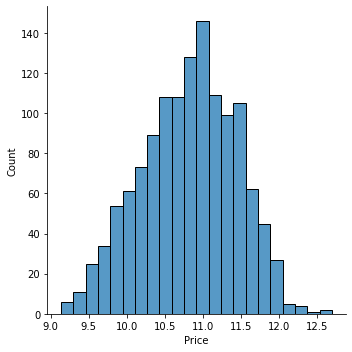

In [42]:
sns.displot(np.log(df['Price']))

# Analysis

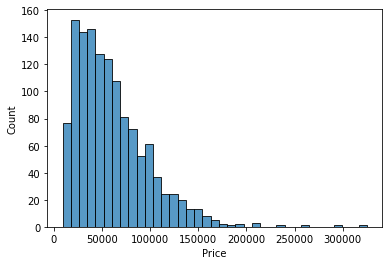

In [43]:
sns.histplot(df['Price'])
plt.show()

How Price vary with different brands of Laptop?

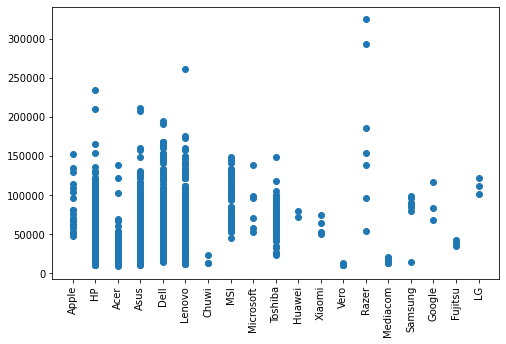

In [44]:
plt.figure(figsize=[8, 5])
plt.scatter(x=df['Company'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

How price vary with Ram of Laptop?

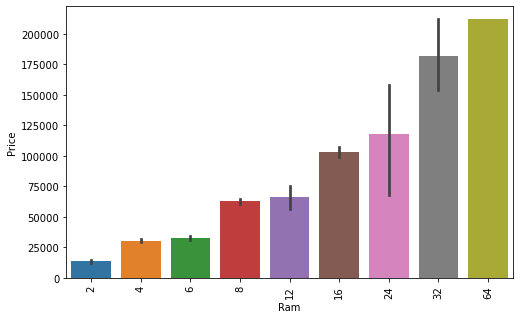

In [45]:
plt.figure(figsize=[8, 5])
sns.barplot(x=df['Ram'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

Most used Gpu brand by Laptops

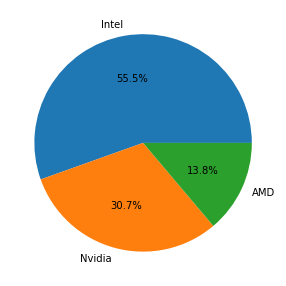

In [46]:

plt.figure(figsize=[8, 5])
plt.pie(df['Gpu brand'].value_counts(), autopct='%1.1f%%', labels=['Intel', 'Nvidia','AMD'])
plt.show()

# Machine Learning Modeling for Laptop Price Prediction

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer


In [48]:
x=df.drop('Price', axis=1)
y=np.log(df['Price'])

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2)

x_train

,Company,TypeName,Ram,Weight,TouchScreen,Ips,ppi,Cpu Brand,HDD,SSD,Hybrid,Flash_Storage,Gpu brand,os
91,Acer,Notebook,8,2.20,0,0,141.211998,Intel Core i7,1000,0,0,0,Nvidia,Windows
863,Lenovo,Gaming,8,2.50,0,1,141.211998,Intel Core i5,1000,0,0,0,Nvidia,Others/No Os/Linux
552,Dell,Gaming,16,4.42,0,1,127.335675,Intel Core i7,1000,256,0,0,Nvidia,Windows
967,HP,Notebook,4,2.04,0,0,141.211998,Intel Core i3,500,0,0,0,Intel,Windows
365,HP,Notebook,8,2.04,0,0,100.454670,Other Intel Processor,2000,0,0,0,Intel,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,100.454670,Intel Core i3,500,0,0,0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,141.211998,Intel Core i7,0,512,0,0,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,100.454670,AMD Processor,1000,0,0,0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,100.454670,Intel Core i3,2000,0,0,0,Nvidia,Others/No Os/Linux


# Implementation for training and testing

We will now put in place a pipeline to speed up the training and testing procedure. Step one involves encoding categorical variables using a column transformer. We then make an object representing our algorithm and send both operations to the pipeline. We forecast the score on fresh data using pipeline objects and we show the precision.

In [49]:
n_cols = x.select_dtypes(include = ['int64', 'float64']).columns
n_cols

Index(['Ram', 'Weight', 'TouchScreen', 'Ips', 'ppi', 'HDD', 'SSD', 'Hybrid',
       'Flash_Storage'],
      dtype='object')

In [50]:
ordi_cols=x.iloc[:, [7]].columns
ordi_cols


Index(['Cpu Brand'], dtype='object')

In [51]:

nom_cols = x.iloc[:, [0, 1, 12, 13]].columns
nom_cols


Index(['Company', 'TypeName', 'Gpu brand', 'os'], dtype='object')

Preprocessing Pipeline

In [52]:
#  Building the Numeric Transformation Pipeline
numeric_transformer = Pipeline(steps = [
    ('imputeN', SimpleImputer(strategy = 'mean')),
    ('scaled', MinMaxScaler())
])


In [53]:
# Building the nominal Transformation Pipeline

nominal_transformer = Pipeline(steps=
                       [
                           ('imputeC',SimpleImputer(strategy="most_frequent")),
                           ('onehot',OneHotEncoder(handle_unknown='ignore'))
                       ])

In [54]:
# Building the ordinal Transformation Pipeline
ordinal_transformer = Pipeline(steps=
                       [
                           ('imputeC',SimpleImputer(strategy="most_frequent")),
                           ('ordinal',OrdinalEncoder(handle_unknown='ignore'))
                       ])

In [55]:
from sklearn.compose import ColumnTransformer

preprocessing = ColumnTransformer(transformers=
                                 [
                                     ('num',numeric_transformer,n_cols),
                                     ('ordinal',ordinal_transformer,ordi_cols),
                                     ('nominal',nominal_transformer,nom_cols)
                                 ]
                                 )

# Linear Regression

In [56]:
 LRestimator = LinearRegression()

In [57]:
LRmodel = Pipeline(steps=
                  [
                      ('pre',preprocessing),
                      ('est',LRestimator)
                  ])


In [58]:
from sklearn import set_config

set_config(display='diagram')
LRmodel.fit(x_train, y_train)


Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputeN',
                                                                   SimpleImputer()),
                                                                  ('scaled',
                                                                   MinMaxScaler())]),
                                                  Index(['Ram', 'Weight', 'TouchScreen', 'Ips', 'ppi', 'HDD', 'SSD', 'Hybrid',
       'Flash_Storage'],
      dtype='object')),
                                                 ('ordinal',
                                                  Pipeline(steps=[('imputeC',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder())]),
                                                  Index(['Cpu Brand'], dtype='object')),
                                                 ('nominal',
                                                  Pipeline(steps=[('imputeC',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Company', 'TypeName', 'Gpu brand', 'os'], dtype='object'))])),
                ('est', LinearRegression())])

In [59]:
print('train score ', LRmodel.score(x_train, y_train))
print('test score ', LRmodel.score(x_test, y_test))

train score  0.7551611551572831
test score  0.7118132366843972


In [60]:
ypred = LRmodel.predict(x_test)
r2_score(y_test, ypred)

0.7118132366843972

In [61]:
mean_squared_error(y_test, ypred)

0.1024898656860138

In [62]:
mean_absolute_error(y_test, ypred)

0.25315474874971716

In [63]:
KNNestimator = KNeighborsRegressor(n_neighbors=5)

In [64]:
KNNmodel=Pipeline(steps=
                 [
                     ('pre', preprocessing),
                     ('est', KNNestimator)
                 ])

In [65]:
set_config(display='diagram')
KNNmodel.fit(x_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputeN',
                                                                   SimpleImputer()),
                                                                  ('scaled',
                                                                   MinMaxScaler())]),
                                                  Index(['Ram', 'Weight', 'TouchScreen', 'Ips', 'ppi', 'HDD', 'SSD', 'Hybrid',
       'Flash_Storage'],
      dtype='object')),
                                                 ('ordinal',
                                                  Pipeline(steps=[('imputeC',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder())]),
                                                  Index(['Cpu Brand'], dtype='object')),
                                                 ('nominal',
                                                  Pipeline(steps=[('imputeC',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Company', 'TypeName', 'Gpu brand', 'os'], dtype='object'))])),
                ('est', KNeighborsRegressor())])

In [66]:
ypred_1 = KNNmodel.predict(x_test)

In [67]:
print("Train Score",KNNmodel.score(x_train, y_train))
print("Test Score",KNNmodel.score(x_test, y_test))

Train Score 0.8595928548629241
Test Score 0.7938637033893143


In [68]:
print("r_2 score", r2_score(y_test, ypred_1))
print("mse score", mean_squared_error(y_test, ypred_1))
print("mae score", mean_absolute_error(y_test, ypred_1))

r_2 score 0.7938637033893143
mse score 0.07330968677941926
mae score 0.20293316991180912


# Decision Tree

In [69]:
DTestimator = DecisionTreeRegressor(max_depth=8)

In [70]:
DTmodel = Pipeline(steps =
                  [
                      ('pre', preprocessing),
                      ('est', DTestimator)
                  ])

In [71]:
set_config(display = 'diagram')
DTmodel.fit(x_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputeN',
                                                                   SimpleImputer()),
                                                                  ('scaled',
                                                                   MinMaxScaler())]),
                                                  Index(['Ram', 'Weight', 'TouchScreen', 'Ips', 'ppi', 'HDD', 'SSD', 'Hybrid',
       'Flash_Storage'],
      dtype='object')),
                                                 ('ordinal',
                                                  Pipeline(steps=[('imputeC',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder())]),
                                                  Index(['Cpu Brand'], dtype='object')),
                                                 ('nominal',
                                                  Pipeline(steps=[('imputeC',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Company', 'TypeName', 'Gpu brand', 'os'], dtype='object'))])),
                ('est', DecisionTreeRegressor(max_depth=8))])

In [72]:
ypred_2 = DTmodel.predict(x_test)

In [73]:
print("Train Score",DTmodel.score(x_train, y_train))
print("Test Score", DTmodel.score(x_test, y_test))

Train Score 0.9136934172046685
Test Score 0.8004691803227244


In [74]:
print("r_2 score", r2_score(y_test, ypred_2))
print("mse score", mean_squared_error(y_test, ypred_2))
print("mae score", mean_absolute_error(y_test, ypred_2))

r_2 score 0.8004691803227244
mse score 0.07096053501440269
mae score 0.19961976862149955
